**Predictive Modeling for Chronic obstructive pulmonary disease Outcomes using Machine Learning**

**Problem**

Here's a unique problem overview tailored specifically for your COPD prediction project:

Chronic Obstructive Pulmonary Disease (COPD) is a progressive respiratory condition characterized by persistent airflow limitation, significantly affecting millions worldwide. Despite being preventable and manageable, COPD often remains underdiagnosed, especially in its early stages, due to its subtle symptoms and overlapping risk factors such as smoking, environmental pollutants, and genetic factors. Traditional diagnostic approaches, such as spirometry, are often conducted late in the disease progression, limiting opportunities for early intervention. Furthermore, the complex nature of COPD makes its prediction challenging, often leading to delays in appropriate care. There is a critical need for innovative solutions that leverage machine learning to analyze diverse patient data, predict disease onset accurately, and identify individuals at high risk. Developing such models can revolutionize COPD management by facilitating timely interventions, personalized treatment plans, and ultimately improving patient outcomes.

In [1]:
!pip install researchpy

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
data = pd.read_csv("/content/COPD dataset.csv")
data.head()

,SL,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,Outcome
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [4]:
data.drop('SL', axis=1, inplace=True)

In [5]:
data.drop('ID', axis=1, inplace=True)

In [6]:
data.head()

,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,Outcome
0,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,98,...,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,65,...,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,86,...,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,27,...,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,98,...,75.56,1,3,1,2,0,1,1,0,0


**Exploring Data**

In [7]:
# check shape of data
data.shape

(101, 22)

In [8]:
# dtypes
data.dtypes

,0
AGE,int64
PackHistory,float64
COPDSEVERITY,object
MWT1,float64
MWT2,float64
MWT1Best,float64
FEV1,float64
FEV1PRED,float64
FVC,float64
FVCPRED,int64


In [9]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           101 non-null    int64  
 1   PackHistory   101 non-null    float64
 2   COPDSEVERITY  101 non-null    object 
 3   MWT1          99 non-null     float64
 4   MWT2          100 non-null    float64
 5   MWT1Best      100 non-null    float64
 6   FEV1          101 non-null    float64
 7   FEV1PRED      101 non-null    float64
 8   FVC           101 non-null    float64
 9   FVCPRED       101 non-null    int64  
 10  CAT           101 non-null    int64  
 11  HAD           101 non-null    float64
 12  SGRQ          101 non-null    float64
 13  AGEquartiles  101 non-null    int64  
 14  copd          101 non-null    int64  
 15  gender        101 non-null    int64  
 16  smoking       101 non-null    int64  
 17  Diabetes      101 non-null    int64  
 18  muscular      101 non-null    

In [10]:
# check missing data
data.isnull().sum()

,0
AGE,0
PackHistory,0
COPDSEVERITY,0
MWT1,2
MWT2,1
MWT1Best,1
FEV1,0
FEV1PRED,0
FVC,0
FVCPRED,0


In [11]:
data = data.dropna()

In [12]:
data[['COPDSEVERITY','AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes', 'muscular','hypertension', 'AtrialFib', 'Outcome']] = data[['COPDSEVERITY','AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes', 'muscular','hypertension', 'AtrialFib', 'Outcome']].astype(object)

<ipython-input-12-670428016c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['COPDSEVERITY','AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes', 'muscular','hypertension', 'AtrialFib', 'Outcome']] = data[['COPDSEVERITY','AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes', 'muscular','hypertension', 'AtrialFib', 'Outcome']].astype(object)


In [13]:
data.isnull().sum()

,0
AGE,0
PackHistory,0
COPDSEVERITY,0
MWT1,0
MWT2,0
MWT1Best,0
FEV1,0
FEV1PRED,0
FVC,0
FVCPRED,0


Descriptive Statistic

In [14]:
# select numeric data
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head()

,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ
0,77,60.0,120.0,120.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55
1,79,50.0,165.0,176.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24
2,80,11.0,201.0,180.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09
3,56,60.0,210.0,210.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04
4,65,68.0,204.0,210.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56


In [15]:
num_cols.columns

Index(['AGE', 'PackHistory', 'MWT1', 'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED',
       'FVC', 'FVCPRED', 'CAT', 'HAD', 'SGRQ'],
      dtype='object')

In [16]:
# summary statistics of numerical variables
rp.summarize(num_cols[['AGE', 'PackHistory', 'MWT1', 'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED',
       'FVC', 'FVCPRED', 'CAT', 'HAD', 'SGRQ']])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,AGE,99,70.1212,71.0,61.9852,7.8731,0.7913,AGE
1,PackHistory,99,39.803,36.0,606.3001,24.6232,2.4747,PackHistory
2,MWT1,99,385.8586,419.0,10971.3471,104.7442,10.5272,MWT1
3,MWT2,99,389.798,399.0,11706.0404,108.1945,10.874,MWT2
4,MWT1Best,99,398.7172,420.0,11453.1845,107.0196,10.7559,MWT1Best
5,FEV1,99,1.6031,1.6,0.457,0.676,0.0679,FEV1
6,FEV1PRED,99,58.4008,60.0,503.8626,22.4469,2.256,FEV1PRED
7,FVC,99,2.9578,2.77,0.9589,0.9793,0.0984,FVC
8,FVCPRED,99,86.3434,84.0,481.1053,21.9341,2.2045,FVCPRED
9,CAT,99,19.404,18.0,355.5494,18.856,1.8951,CAT


In [17]:
# select categorical data
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head()

,COPDSEVERITY,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,Outcome
0,SEVERE,4,3,1,2,1,0,0,1,0
1,MODERATE,4,2,0,2,1,0,0,1,1
2,MODERATE,4,2,0,2,1,0,0,1,0
3,VERY SEVERE,1,4,1,2,0,0,1,1,0
4,SEVERE,1,3,1,2,0,1,1,0,0


In [18]:
cat_cols.columns

Index(['COPDSEVERITY', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'Outcome'],
      dtype='object')

In [19]:
# summary statistics of categorical variables
rp.summary_cat(cat_cols[['COPDSEVERITY', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'Outcome']])

,Variable,Outcome,Count,Percent
0,COPDSEVERITY,MODERATE,41,41.41
1,,SEVERE,27,27.27
2,,MILD,23,23.23
3,,VERY SEVERE,8,8.08
4,AGEquartiles,3,28,28.28
5,,1,25,25.25
6,,2,24,24.24
7,,4,22,22.22
8,copd,2,41,41.41
9,,3,27,27.27


**Correlations between Variable**

In [20]:
# correlation: Pearson’s by default
num_cols.corr(method='pearson')

,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ
AGE,1.000000,-0.021614,-0.246847,-0.234462,-0.227397,-0.087169,0.080862,-0.129459,0.014883,0.081531,-0.210833,-0.127909
PackHistory,-0.021614,1.000000,-0.251895,-0.280635,-0.249865,-0.120797,-0.123172,-0.081097,0.001033,-0.146967,0.044868,0.042651
MWT1,-0.246847,-0.251895,1.000000,0.954434,0.982371,0.458655,0.364297,0.449893,0.257159,-0.135281,-0.262240,-0.507541
MWT2,-0.234462,-0.280635,0.954434,1.000000,0.982244,0.470493,0.408255,0.456276,0.299864,-0.153157,-0.293162,-0.522844
MWT1Best,-0.227397,-0.249865,0.982371,0.982244,1.000000,0.468083,0.388947,0.444527,0.258128,-0.153593,-0.294638,-0.537424
FEV1,-0.087169,-0.120797,0.458655,0.470493,0.468083,1.000000,0.775323,0.818421,0.514994,-0.063451,-0.163453,-0.314719
FEV1PRED,0.080862,-0.123172,0.364297,0.408255,0.388947,0.775323,1.000000,0.519598,0.624727,0.009657,-0.121885,-0.340204
FVC,-0.129459,-0.081097,0.449893,0.456276,0.444527,0.818421,0.519598,1.000000,0.623630,-0.158801,-0.145300,-0.232152
FVCPRED,0.014883,0.001033,0.257159,0.299864,0.258128,0.514994,0.624727,0.623630,1.000000,-0.137885,-0.160940,-0.294018
CAT,0.081531,-0.146967,-0.135281,-0.153157,-0.153593,-0.063451,0.009657,-0.158801,-0.137885,1.000000,0.166804,0.290358


Skewness

In [21]:
num_cols.skew()

,0
AGE,-0.737041
PackHistory,0.761152
MWT1,-0.311096
MWT2,-0.156457
MWT1Best,-0.276048
FEV1,0.463046
FEV1PRED,-0.152857
FVC,0.509557
FVCPRED,0.011179
CAT,7.386027


**Data Visualizations**

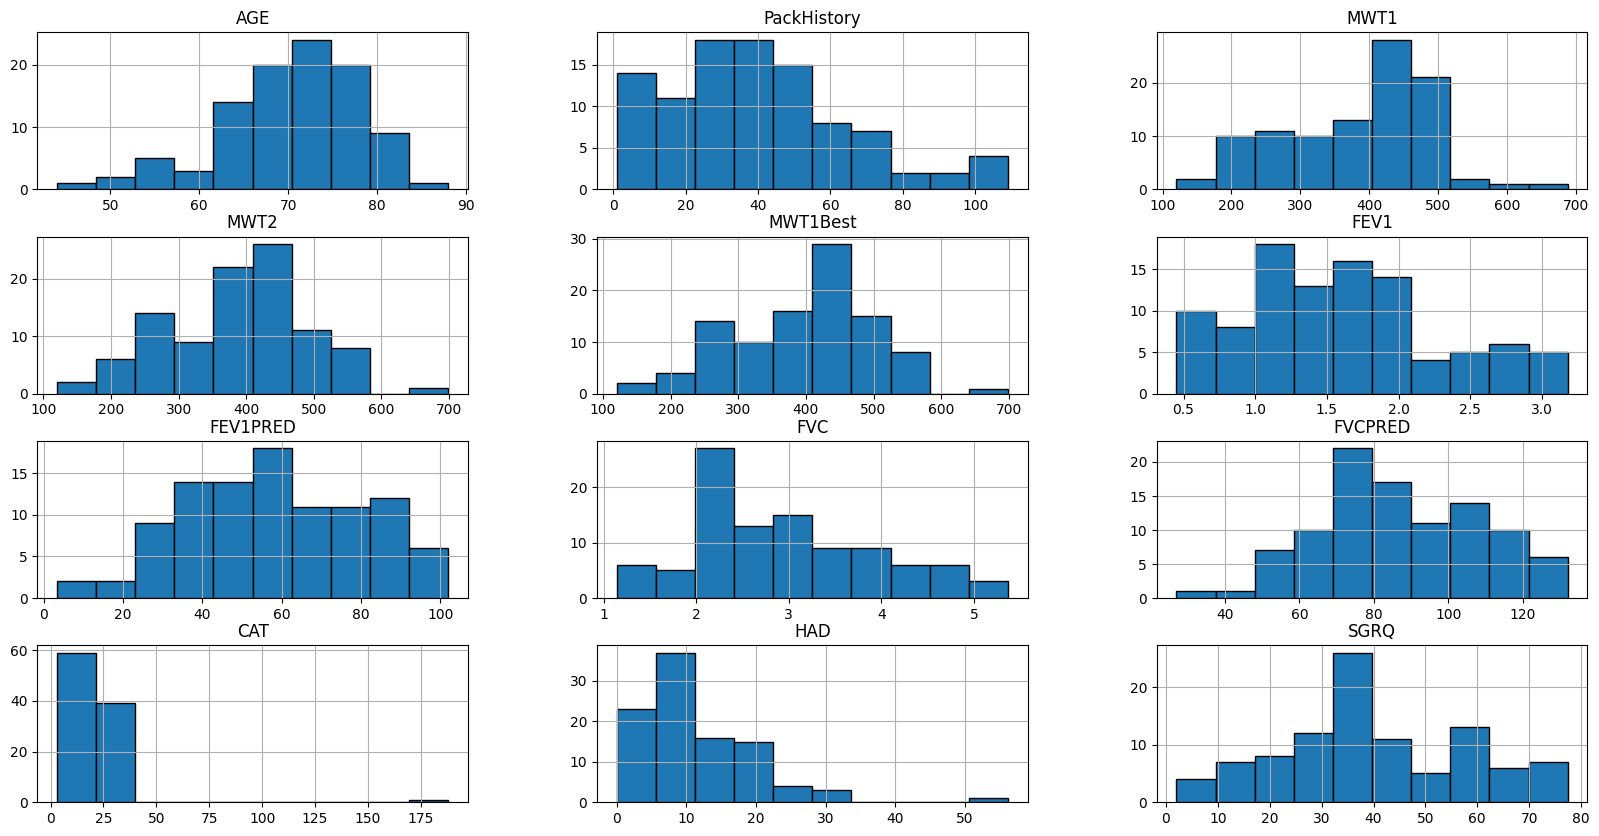

In [22]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show()

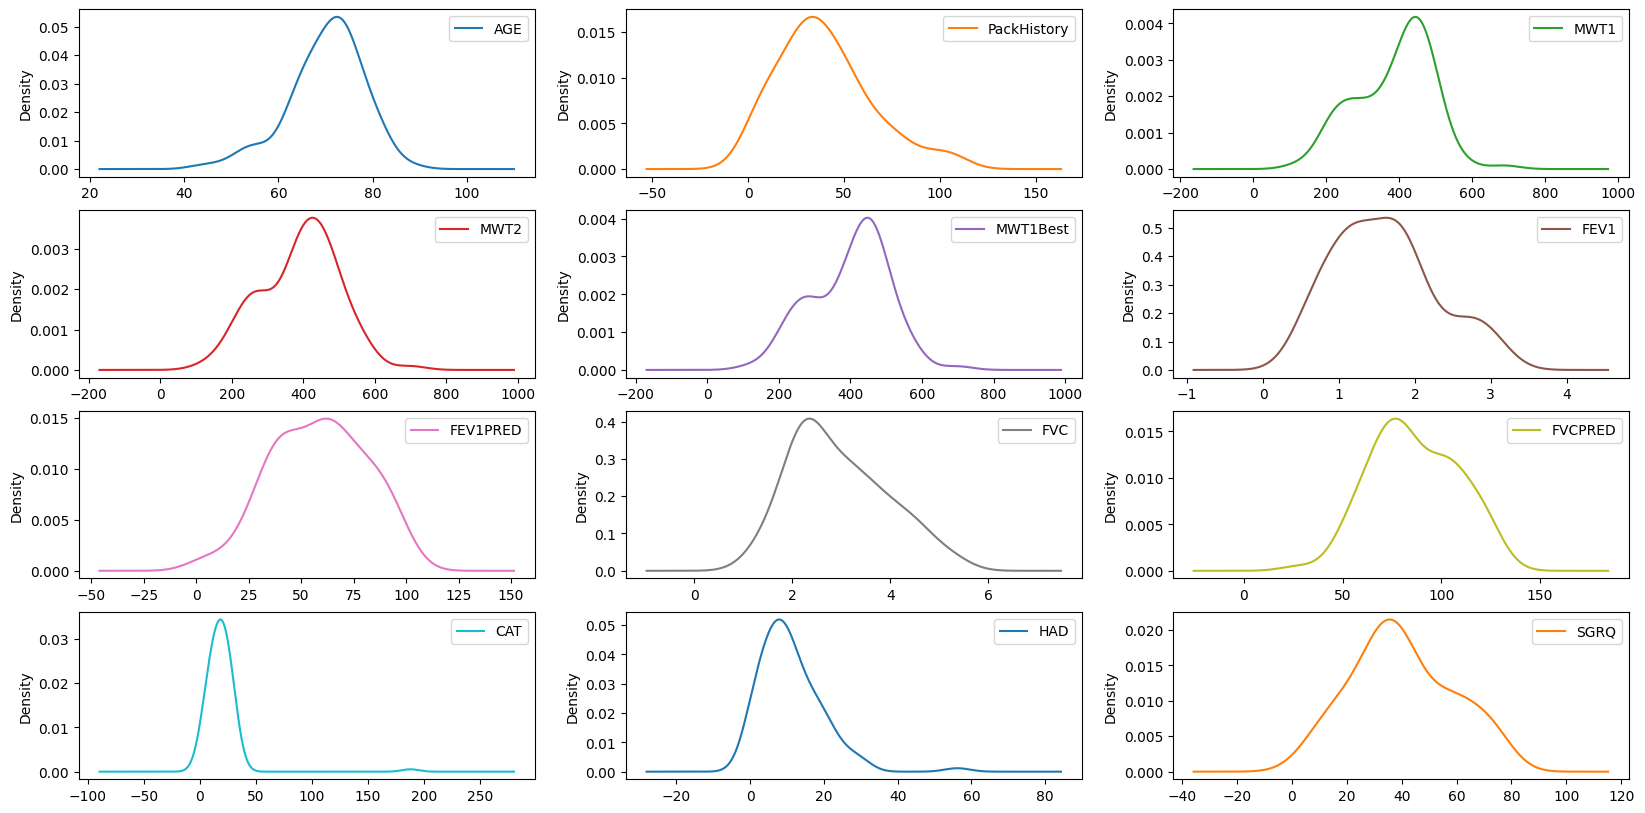

In [23]:
# Univariate distributions with density plot
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show()

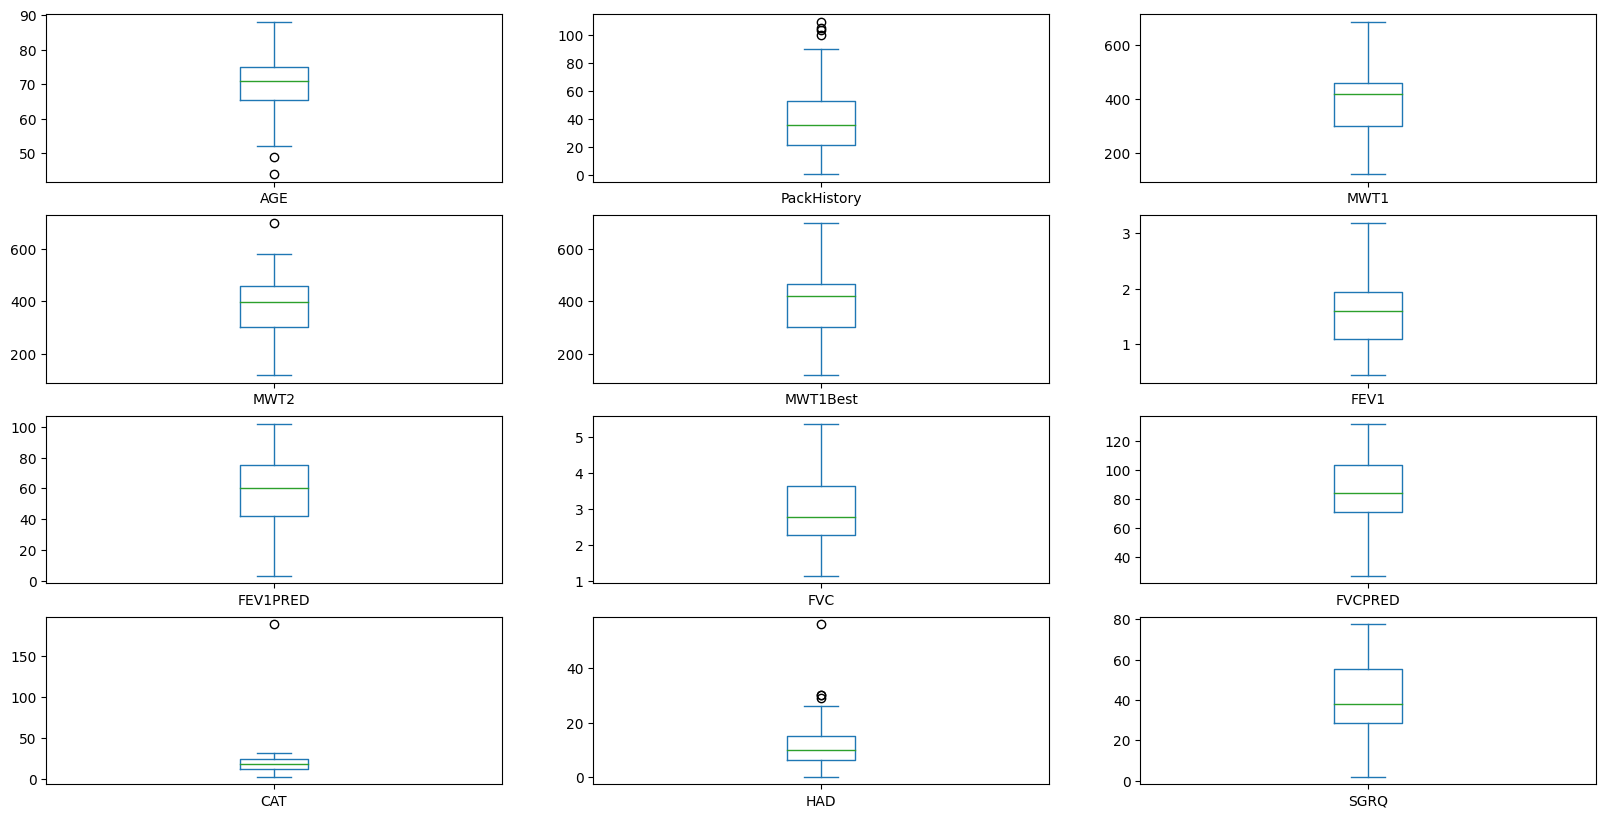

In [24]:
# Univariate distributions with box plots
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show()

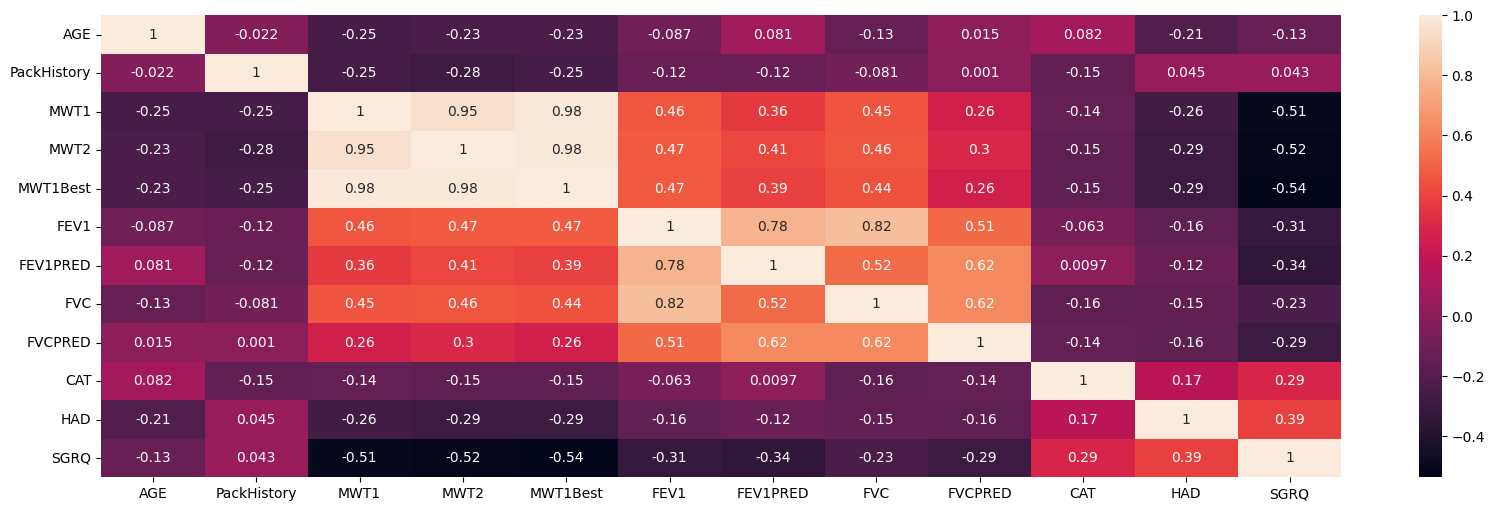

In [25]:
# Multivariate plots with correlations
plt.figure(figsize=(20,6))
corr = num_cols.corr()
sns.heatmap(corr, annot=True)
plt.show()

**Set-up**

In [26]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-3yqgu6qb
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-3yqgu6qb
  Resolved https://github.com/pycaret/pycaret.git to commit 97649adf8965fd02831c14982a48323b6ce7de4c
  Preparing metadata (setup.py) ... done


In [27]:
!pip install -q --upgrade pip
!pip install -q pycaret

In [28]:
!pip install --upgrade pycaret

In [29]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'Outcome', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(99, 22)"
4,Transformed data shape,"(99, 31)"
5,Transformed train set shape,"(69, 31)"
6,Transformed test set shape,"(30, 31)"
7,Numeric features,12
8,Categorical features,9
9,Preprocess,True


In [30]:
!pip install --upgrade pandas

**Compare Models**

In [31]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9286,0.3833,0.1000,0.1000,0.1000,nan,0.1000,0.4220
knn,K Neighbors Classifier,0.9143,0.2833,0.0000,0.0000,0.0000,nan,0.0000,0.1550
qda,Quadratic Discriminant Analysis,0.9143,0.3000,0.0000,0.0000,0.0000,nan,0.0000,0.1650
dummy,Dummy Classifier,0.9143,0.3000,0.0000,0.0000,0.0000,nan,0.0000,0.2700
svm,SVM - Linear Kernel,0.9000,0.5667,0.0000,0.0000,0.0000,nan,0.0000,0.1490
ridge,Ridge Classifier,0.8976,0.4500,0.0000,0.0000,0.0000,nan,0.0000,0.1500
rf,Random Forest Classifier,0.8976,0.3750,0.0000,0.0000,0.0000,nan,0.0000,0.3090
ada,Ada Boost Classifier,0.8976,0.5000,0.1000,0.1000,0.1000,nan,0.1000,0.3200
et,Extra Trees Classifier,0.8976,0.4250,0.0000,0.0000,0.0000,nan,0.0000,0.2710
xgboost,Extreme Gradient Boosting,0.8667,0.4000,0.0000,0.0000,0.0000,nan,-0.0167,0.1980


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Create Model**

In [32]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
3,0.8571,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8571,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8571,0.1667,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8571,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8571,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
# print model parameters
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


**Tune Model**

In [34]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
3,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
tuned_lightgbm, tuner = tune_model(lightgbm, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
3,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8571,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [37]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['AGE',
                                                                          'PackHistory',
                                                                          'MWT1',
                                                                          'MWT2',
                                                                          'MWT1Best',
                                                                          'FEV1',
                                                                          'FEV1PRED',
                                                                          'FVC',
                                                                          'FVCPRED',
                                                                          'CAT',
                                                                          'HAD',
                                                                          'SGRQ'],
                                                                 transformer=SimpleImputer(add_indic...
                                        'actual_estimator__reg_alpha': [1e-07,
                                                                        1e-06,
                                                                        0.0001,
                                                                        0.001,
                                                                        0.01,
                                                                        0.0005,
                                                                        0.005,
                                                                        0.05,
                                                                        0.1,
                                                                        0.15,
                                                                        0.2,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5,
                                                                        0.7, 1,
                                                                        2, 3, 4,
                                                                        5, 10],
                                        'actual_estimator__reg_lambda': [1e-07,
                                                                         1e-06,
                                                                         0.0001,
                                                                         0.001,
                                                                         0.01,
                                                                         0.0005,
                                                                         0.005,
                                                                         0.05,
                                                                         0.1,
                                                                         0.15,
                                                                         0.2,
                                                                         0.3,
                                                                         0.4,
                                                                         0.5,
                                                                         0.7, 1,
                                   

**Analyze Model**

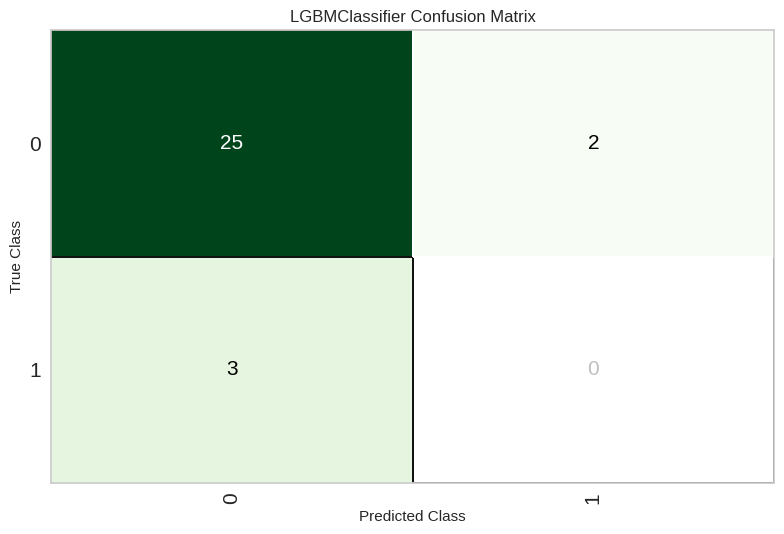

In [38]:
# plot confusion matrix
plot_model(lightgbm, plot = 'confusion_matrix')

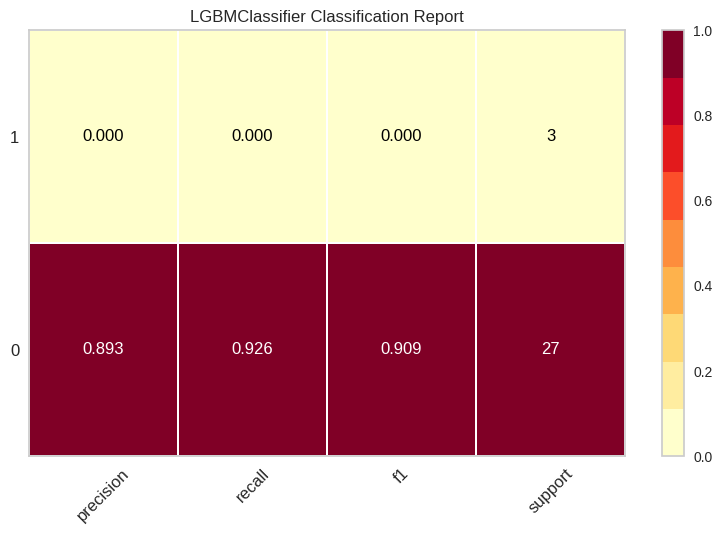

In [39]:
# plot class report
plot_model(lightgbm, plot = 'class_report')

**Evaluate Model**

In [40]:
# finalize a model
finalize_model(lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AGE', 'PackHistory', 'MWT1',
                                             'MWT2', 'MWT1Best', 'FEV1',
                                             'FEV1PRED', 'FVC', 'FVCPRED',
                                             'CAT', 'HAD', 'SGRQ'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('catego...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

**Prediction**

In [41]:
# predict on test set
holdout_pred = predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8333,0.4444,0.0000,0.0000,0.0000,-0.0870,-0.0891


In [42]:
# show predictions
holdout_pred.head()

,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,...,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,Outcome,prediction_label,prediction_score
37,74,64.0,MODERATE,384.0,372.0,384.0,2.37,74.0,4.70,111,...,2,1,2,0,1,0,0,0,0,0.7810
44,73,59.0,MODERATE,405.0,405.0,405.0,2.43,75.0,5.37,125,...,2,1,2,0,0,0,0,0,0,0.7161
39,71,20.0,MILD,390.0,390.0,390.0,1.32,85.0,2.27,119,...,1,0,2,1,0,0,0,0,0,0.9831
72,75,5.0,MODERATE,462.0,423.0,462.0,2.43,79.0,4.33,107,...,2,1,2,0,0,0,0,0,0,0.9494
50,65,34.0,MODERATE,420.0,420.0,420.0,1.45,61.0,2.85,101,...,2,0,1,0,1,0,0,0,0,0.9712


In [44]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('Outcome', axis=1, inplace=True)
new_data.head()

,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,...,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib
0,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,98,...,8.0,69.55,4,3,1,2,1,0,0,1
1,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,65,...,21.0,44.24,4,2,0,2,1,0,0,1
2,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,86,...,18.0,44.09,4,2,0,2,1,0,0,1
3,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,27,...,26.0,62.04,1,4,1,2,0,0,1,1
4,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,98,...,18.0,75.56,1,3,1,2,0,1,1,0


In [45]:
# predict model on new_data
predictions = predict_model(lightgbm, data = new_data)
predictions.head()

,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,...,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,prediction_label,prediction_score
0,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,98,...,4,3,1,2,1,0,0,1,0,0.9080
1,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,65,...,4,2,0,2,1,0,0,1,0,0.9166
2,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,86,...,4,2,0,2,1,0,0,1,0,0.9997
3,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,27,...,1,4,1,2,0,0,1,1,0,0.7810
4,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,98,...,1,3,1,2,0,1,1,0,0,0.7161


**Save Model**

In [46]:
# save pipeline
save_model(lightgbm, 'E:\COPD_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AGE', 'PackHistory', 'MWT1',
                                              'MWT2', 'MWT1Best', 'FEV1',
                                              'FEV1PRED', 'FVC', 'FVCPRED',
                                              'CAT', 'HAD', 'SGRQ'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('catego...
                  LGBMClassifier(boosting_type='gbdt

In [48]:
# load pipeline
loaded_best_pipeline = load_model('E:\COPD_Model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AGE', 'PackHistory', 'MWT1',
                                             'MWT2', 'MWT1Best', 'FEV1',
                                             'FEV1PRED', 'FVC', 'FVCPRED',
                                             'CAT', 'HAD', 'SGRQ'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean')...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

**Discussion**

The Light Gradient Boosting Machine (LightGBM) model has predicted with precision at 83% accuracy.